In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
try: 
    os.mkdir('img_align_celeba')

    # Now perform the following 100 times:
    for img_i in range(1, 101):

        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i

        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('img_align_celeba', f))
except:
    #os.rm('img_align_celeba')
    print("You may need to delete the existing 'img_align_celeba' folder in your directory")

You may need to delete the existing 'img_align_celeba' folder in your directory


In [3]:
files = os.listdir('img_align_celeba')# img.<tab>
import matplotlib.pyplot as plt
import numpy as np

print(os.path.join('img_align_celeba', files[0]))
plt.imread(os.path.join('img_align_celeba', files[0]))

files = [os.path.join('img_align_celeba', file_i)
 for file_i in os.listdir('img_align_celeba')
 if '.jpg' in file_i]

# There should be 100 files, with the last one being number 99

img = plt.imread(files[50])

print(img)

img_align_celeba/000026.jpg
[[[206 203 210]
  [205 202 209]
  [204 201 208]
  ...
  [218 216 227]
  [219 216 227]
  [219 216 227]]

 [[206 203 210]
  [205 202 209]
  [204 201 208]
  ...
  [218 216 227]
  [219 216 227]
  [219 216 227]]

 [[206 203 210]
  [205 202 209]
  [204 201 208]
  ...
  [218 216 227]
  [219 216 227]
  [219 216 227]]

 ...

 [[234 238 241]
  [234 238 241]
  [234 238 241]
  ...
  [148 111  93]
  [156 123 108]
  [158 125 110]]

 [[235 239 242]
  [235 239 242]
  [235 239 242]
  ...
  [144 107  89]
  [162 128 116]
  [154 120 108]]

 [[235 239 242]
  [235 239 242]
  [235 239 242]
  ...
  [144 107  89]
  [132  98  88]
  [124  90  80]]]


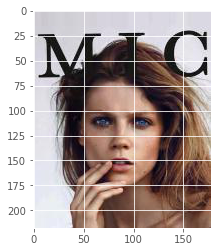

In [4]:
# If nothing is drawn and you are using notebook, try uncommenting the next line:
#%matplotlib inline
plt.imshow(img)

## Understanding Image Shapes

In [5]:
img.shape
# (218, 178, 3)

(218, 178, 3)

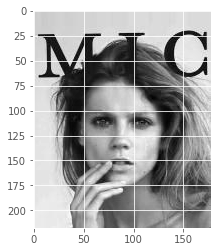

In [6]:
plt.imshow(img[:, :, 0], cmap='gray') # Red Channel

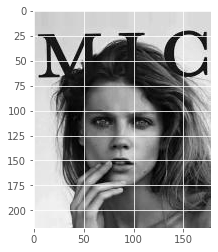

In [7]:
plt.imshow(img[:, :, 1], cmap='gray') # Green Channel

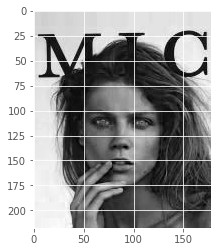

In [8]:
plt.imshow(img[:, :, 2], cmap='gray') # Blue Channel

In [9]:
imgs = [plt.imread(files[file_i])
        for file_i in range(100)]

#imgs = utils.get_celeb_imgs() # nope nope nope

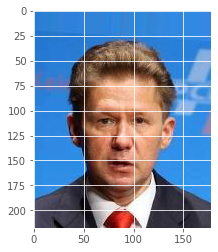

In [10]:
plt.imshow(imgs[1])

## The Batch Dimension

In [11]:
imgs[0].shape

(218, 178, 3)

In [12]:
data = np.array(imgs) # make 'data' = our numpy array
data.shape
print(data.shape)
print("The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels")
print("If your images aren't all the same size to begin with, then this won't work!")

(100, 218, 178, 3)
The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels
If your images aren't all the same size to begin with, then this won't work!


## Mean/Deviation of Images

look at this average person


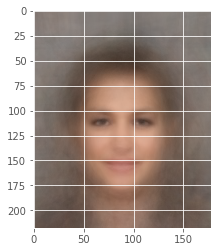

In [13]:
mean_img = np.mean(data, axis=0) # This is the mean of the 'batch' channel
plt.imshow(mean_img.astype(np.uint8))
print("look at this average person")

This is the standard deviation - the variance of the mean


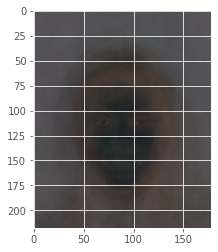

In [14]:
std_img = np.std(data, axis=0)
plt.imshow(std_img.astype(np.uint8))
print("This is the standard deviation - the variance of the mean")

Mean of all colour channels


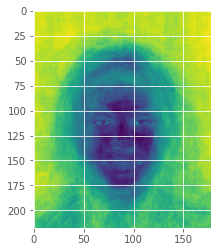

In [15]:
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8)) # Mean of all colour channels
print("Mean of all colour channels")

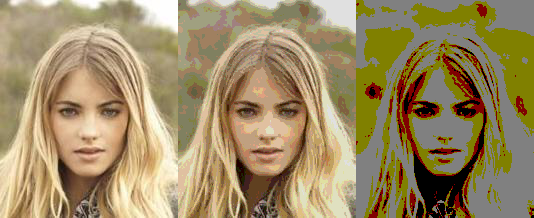

In [16]:
# Color Reduction

from PIL import Image

redux32 = imgs[4] // 32 * 32
redux128 = imgs[4] // 128 * 128

outRedux = np.concatenate((imgs[4], redux32, redux128), axis=1)

Image.fromarray(outRedux)

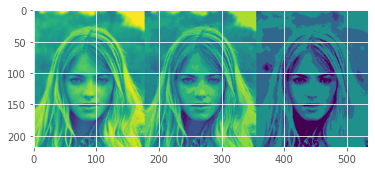

In [17]:
# Color Reduction Mean
outRedux = np.concatenate((imgs[4], redux32, redux128), axis=1)
mean_redux = np.mean(outRedux, axis=2) 
plt.imshow(mean_redux.astype(np.uint8))

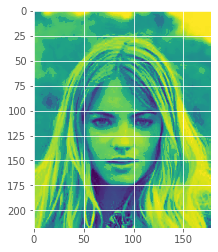

In [18]:
outRedux = np.concatenate((imgs[4], redux32, redux128), axis=2)
mean_redux = np.mean(outRedux, axis=2) 
plt.imshow(mean_redux.astype(np.uint8))

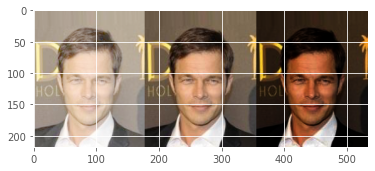

In [19]:
# Gamma Correction

gamma_1_22 = 255.0 * (imgs[2] / 255.0)**(1 / 2.2)
gamma_22 = 255.0 * (imgs[2] / 255.0)**2.2

outGamma = np.concatenate((gamma_1_22, imgs[2], gamma_22), axis=1)

plt.imshow(np.uint8(outGamma))

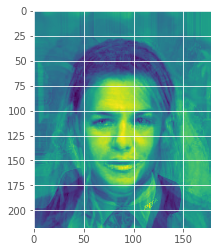

In [20]:
# Smaller mean set

mHumanArray = np.concatenate((imgs[5], imgs[4], imgs[3], imgs[2], imgs[1]), axis=2)
mHumanMean = np.mean(mHumanArray, axis=2) 
plt.imshow(mHumanMean.astype(np.uint8))

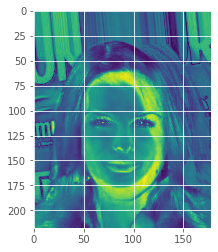

In [21]:
# Deviation between 2 humans

mHumanArray = np.concatenate((imgs[10], imgs[21]), axis=2)
mHumanMean = np.std(mHumanArray, axis=2) 
plt.imshow(mHumanMean.astype(np.uint8))

## Dataset Preprocessing

### Histograms

In [22]:
flattened = data.ravel()
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html
print(data[:1])
print(flattened[:10])

[[[[186 168 166]
   [181 166 163]
   [180 166 163]
   ...
   [173 156 149]
   [188 173 170]
   [139 124 121]]

  [[186 168 166]
   [181 166 163]
   [180 166 163]
   ...
   [167 150 143]
   [187 172 169]
   [144 129 126]]

  [[186 168 166]
   [181 166 163]
   [179 165 162]
   ...
   [154 137 130]
   [181 166 163]
   [149 134 131]]

  ...

  [[253 248 254]
   [253 248 254]
   [253 248 254]
   ...
   [108  59  42]
   [ 91  64  35]
   [ 91  64  35]]

  [[253 248 254]
   [253 248 254]
   [253 248 254]
   ...
   [100  53  35]
   [ 82  55  26]
   [ 87  60  31]]

  [[253 248 254]
   [253 248 254]
   [253 248 254]
   ...
   [ 99  54  35]
   [ 82  55  26]
   [ 87  60  31]]]]
[186 168 166 181 166 163 180 166 163 183]


(array([216804., 117821.,  99125.,  71049.,  66478.,  62066.,  62528.,
         58085.,  56686.,  56114.,  56848.,  58551.,  63168.,  61086.,
         59193.,  59305.,  62526.,  63596.,  62285.,  65061.,  63389.,
         61989.,  61411.,  60742.,  60464.,  60307.,  59074.,  59312.,
         60353.,  64807.,  67305.,  61667.,  59906.,  60546.,  62017.,
         62268.,  63030.,  62799.,  62396.,  62609.,  59541.,  58918.,
         57822.,  61451.,  63481.,  57782.,  57212.,  56516.,  56039.,
         58385.,  56252.,  55089.,  54677.,  52066.,  51012.,  48826.,
         47602.,  46064.,  45351.,  43735.,  42849.,  42903.,  42571.,
         41789.,  42412.,  42705.,  42982.,  43107.,  43372.,  43416.,
         43323.,  42808.,  42253.,  42302.,  42008.,  41846.,  42800.,
         42476.,  42435.,  42405.,  42584.,  42612.,  42671.,  42344.,
         42610.,  42023.,  42214.,  41700.,  41302.,  41160.,  41885.,
         42650.,  41703.,  42498.,  41983.,  42702.,  42735.,  43540.,
      

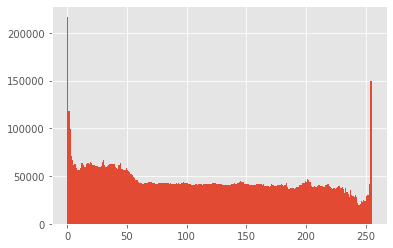

In [23]:
plt.hist(flattened.ravel(), 255)

## Histogram Equalization

(array([   2.,    0.,    0.,    0.,    2.,   18.,   30.,   23.,   42.,
          42.,   43.,   41.,   51.,   48.,   30.,   52.,   58.,   59.,
          67.,   67.,   71.,   83.,   94.,  110.,  110.,  107.,  134.,
         103.,  109.,  160.,  198.,  206.,  211.,  265.,  306.,  289.,
         344.,  335.,  361.,  382.,  402.,  390.,  400.,  497.,  544.,
         594.,  663.,  679.,  749.,  803.,  847.,  882.,  886.,  938.,
         817.,  857.,  801.,  825.,  831.,  896.,  875.,  861.,  843.,
         870.,  842.,  897.,  863.,  861.,  906.,  939.,  905.,  935.,
         946.,  972., 1004., 1064., 1079., 1124., 1162., 1103., 1129.,
        1108., 1085., 1079., 1051., 1155., 1068., 1093., 1170., 1171.,
        1146., 1213., 1146., 1174., 1211., 1229., 1173., 1196., 1216.,
        1150., 1255., 1373., 1344., 1445., 1554., 1554., 1553., 1478.,
        1506., 1469., 1546., 1626., 1659., 1568., 1548., 1559., 1576.,
        1376., 1283., 1189., 1151., 1093., 1046., 1068., 1021., 1059.,
      

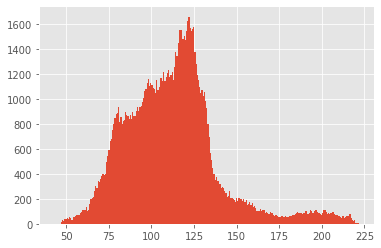

In [24]:
plt.hist(mean_img.ravel(), 255)

Text(0.5, 1.0, '(img - mean) distribution')

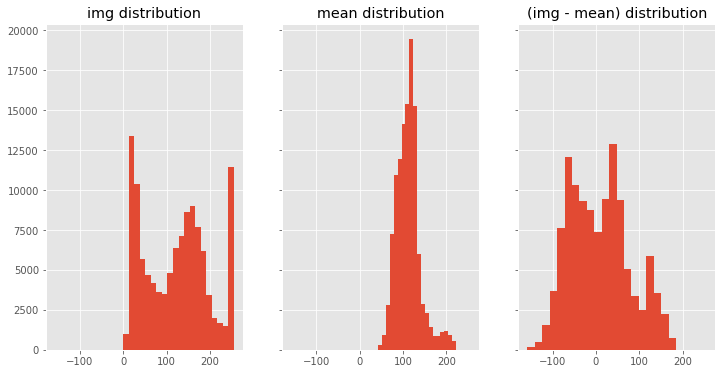

In [25]:
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

Text(0.5, 1.0, '((img - mean) / std_dev) distribution')

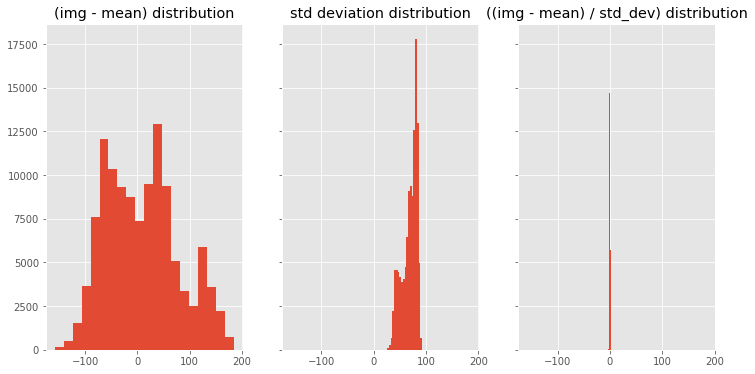

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')

In [27]:
axs[2].set_xlim([-150, 150])
axs[2].set_xlim([-100, 100])
axs[2].set_xlim([-50, 50])
axs[2].set_xlim([-10, 10])
axs[2].set_xlim([-5, 5])

(-5.0, 5.0)

# Tensorflow Basics

## Variables

In [35]:
# uncheck this for colab
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

import tensorflow as tf

SyntaxError: invalid syntax (pywrap_tensorflow_internal.py, line 114)

In [29]:
x = np.linspace(-3.0, 3.0, 100)

# Immediately, the result is given to us.  An array of 100 numbers equally spaced from -3.0 to 3.0.
print(x)

# We know from numpy arrays that they have a `shape`, in this case a 1-dimensional array of 100 values
print(x.shape)

# and a `dtype`, in this case float64, or 64 bit floating point values.
print(x.dtype)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

## Tensors

In [ ]:
x = tf.linspace(-3.0, 3.0, 100)
print(x)

## Graphs

In [ ]:
g = tf.get_default_graph()

## Operations

In [ ]:
[op.name for op in g.get_operations()]

## Tensor

In [ ]:
g.get_tensor_by_name('LinSpace' + ':0')

## Sessions

In [ ]:
# We're first going to create a session:
sess = tf.Session()

# Now we tell our session to compute anything we've created in the tensorflow graph.
computed_x = sess.run(x)
print(computed_x)

# Alternatively, we could tell the previous Tensor to evaluate itself using this session:
computed_x = x.eval(session=sess)
print(computed_x)

# We can close the session after we're done like so:
sess.close()

In [ ]:
sess = tf.Session(graph=g)
sess.close()

In [ ]:
g2 = tf.Graph()

In [ ]:
sess = tf.InteractiveSession()
x.eval()

## Tensor Shapes

In [ ]:
# We can find out the shape of a tensor like so:
print(x.get_shape())

# %% Or in a more friendly format
print(x.get_shape().as_list())

## Many Operations

In [ ]:
# The 1 dimensional gaussian takes two parameters, the mean value, and the standard deviation, which is commonly denoted by the name sigma.
mean = 0.0
sigma = 1.0

# Don't worry about trying to learn or remember this formula.  I always have to refer to textbooks or check online for the exact formula.
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

In [ ]:
res = z.eval()
plt.plot(res)
# if nothing is drawn, and you are using ipython notebook, uncomment the next two lines:
#%matplotlib inline
#plt.plot(res)

# Convolution

## Creating a 2-D Gaussian Kernel

In [ ]:
# Let's store the number of values in our Gaussian curve.
ksize = z.get_shape().as_list()[0]

# Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

# Execute the graph
plt.imshow(z_2d.eval())